[google collab version](https://colab.research.google.com/github/boazbk/nandnotebooks/blob/master/Lecture03_Defining_Computation.ipynb) (might have to click to allow "scripts from insecure source")

In [115]:
%%html
<style>

.CodeMirror {
    width: 100vw;
}
S
.container {
    width: 99% !important;
}

.rendered_html {
  font-size:0.8em;
}
.rendered_html table, .rendered_html th, .rendered_html tr, .rendered_html td {
     font-size: 100%;
}

</style>

In [ ]:
%%capture
%run "NAND programming language.ipynb"
# from IPython.display import clear_output
# clear_output()

![alt](ahlfors.png "")

## Lecture 3: Defining Computation

In [113]:
from IPython.core.display import HTML
HTML('Laptops etc last 5 rows<br><iframe src="http://free.timeanddate.com/countdown/i5vf6j5p/n43/cf11/cm0/cu4/ct1/cs1/ca0/co0/cr0/ss0/cac09f/cpc09f/pct/tcfff/fs100/szw576/szh243/iso2018-09-11T10:30:00" allowTransparency="true" frameborder="0" width="177" height="35"></iframe>')


   ## On collaboration
    
   Solving  _80% of questions on your own_ is better for your understanding __and grade__ than solving _100% with others_.



## Computation

Like a recipe - follow _sequence of basic steps_ to achieve desired result

Important to distinguish **what** and **how**

**what**/**specification**: The function $F:\{0,1\}^n \rightarrow \{0,1\}^m$ we want to compute

**how**/**implementation**: The _algorithm_ or _program_ specifying instructions how to compute it.

There are many programs to compute the same function!

## Is the following a function?

In [ ]:
def f(n):
    return n*2

a. Yes

b. No

[pollev.com/cs121](http://pollev.com/cs121)

In [117]:
%%html
<iframe src="https://e.ggtimer.com/60?alert=false" frameborder="0" allowfullscreen  width=" 80%" height="100" style="box-shadow: 0 0 16px gray; margin: 10px;" name="test" id="test"></iframe>

## NO

In [ ]:
def f(n):
    return n*2

def g(n):
    L = []
    for i in range(n): L = L + [2]
    return sum(L)
    

In [121]:
f(30000)

60000

In [122]:
g(30000)

60000

In [120]:
[f(n)==g(n) for n in range(10)]

[True, True, True, True, True, True, True, True, True, True]

`f` and `g` _compute_ the same function but they are _not_ identical objects. 

## Computing using NAND

![alt](transistor-NAND-Gate.png "")

![alt](moorelaw.jpeg "")

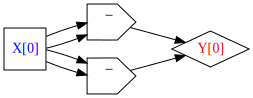

In [123]:
def mystery1(x): return NAND(NAND(x,x),NAND(x,x))

nandcircuit(mystery1)

In [124]:
print(nandcode(mystery1))


Temp[0] = NAND(X[0],X[0])
Temp[1] = NAND(X[0],X[0])
Y[0] = NAND(Temp[0],Temp[1])


What function does `mystery1` compute?

In [125]:
%%html
<iframe src="https://e.ggtimer.com/120?alert=false" frameborder="0" allowfullscreen  width=" 80%" height="100" style="box-shadow: 0 0 16px gray; margin: 10px;" name="test" id="test"></iframe>

In [ ]:
def mystery2(a,b): return AND(a,NOT(b))

## Which function does mystery2 compute?

In [129]:
print(nandcode(mystery2))


Temp[0] = NAND(X[1],X[1])
Temp[1] = NAND(X[0],Temp[0])
Y[0] = NAND(Temp[1],Temp[1])


In [127]:
%%html
<iframe src="https://e.ggtimer.com/180?alert=false" frameborder="0" allowfullscreen  width=" 70%" height="100" style="box-shadow: 0 0 16px gray; margin: 10px;" name="test" id="test"></iframe>

In [130]:
for a in [0,1]: 
    for b in [0,1]:
        print(f"{a} {b} | {mystery2(a,b)}") 

0 0 | 0
0 1 | 0
1 0 | 1
1 1 | 0


__Exercise:__  Draw NAND circuit for function $BIG_2:\{0,1\}^4 \rightarrow \{0,1\}$ such that $BIGGER(a,b,c,d)=1$ iff $a+2*b > c +2*d$

In [131]:
%%html
<iframe src="https://e.ggtimer.com/240?alert=false" frameborder="0" allowfullscreen  width=" 80%" height="100" style="box-shadow: 0 0 16px gray; margin: 10px;" name="test" id="test"></iframe>

__Exercise:__  Draw NAND circuit for function $BIG_2:\{0,1\}^4 \rightarrow \{0,1\}$ such that $BIGGER(a,b,c,d)=1$ iff $a+2*b > c +2*d$

In [132]:
def NOT(a): return NAND(a,a)
def OR(a,b): return NAND(NOT(a),NOT(b))
def AND(a,b): return NOT(NAND(a,b))
#  b>d OR [ NOT(d>b) AND ( a>c ) ]
def BIG2(a,b,c,d):  return OR(mystery2(b,d),AND(NOT(mystery2(d,b)),mystery2(a,c)))

In [ ]:
import itertools

In [133]:
for (a,b,c,d) in itertools.product([0,1],[0,1],[0,1],[0,1]): # ∀(a,b,c,d)∈{0,1}×{0,1}×{0,1}×{0,1}
    print(f"{a} {b} {c} {d} |  {a+2*b} {c+2*d} | {BIG2(a,b,c,d)}")

0 0 0 0 |  0 0 | 0
0 0 0 1 |  0 2 | 0
0 0 1 0 |  0 1 | 0
0 0 1 1 |  0 3 | 0
0 1 0 0 |  2 0 | 1
0 1 0 1 |  2 2 | 0
0 1 1 0 |  2 1 | 1
0 1 1 1 |  2 3 | 0
1 0 0 0 |  1 0 | 1
1 0 0 1 |  1 2 | 0
1 0 1 0 |  1 1 | 0
1 0 1 1 |  1 3 | 0
1 1 0 0 |  3 0 | 1
1 1 0 1 |  3 2 | 1
1 1 1 0 |  3 1 | 1
1 1 1 1 |  3 3 | 0


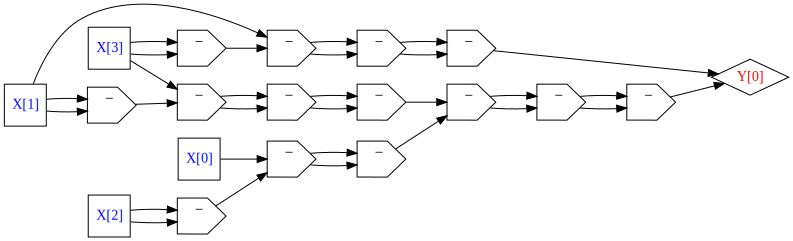

In [134]:
nandcircuit(BIG2)

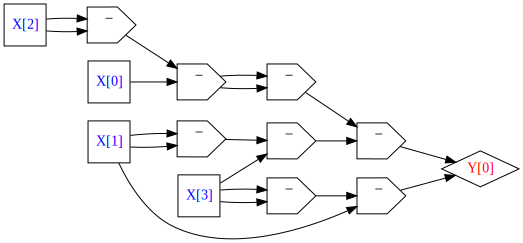

In [135]:
nandcircuit(BIG2,pruneit=True)

## Getting the code and syntactic sugar

In [ ]:
def NOT(a): return NAND(a,a)
def OR(a,b): return NAND(NOT(a),NOT(b))
def AND(a,b): return NOT(NAND(a,b))

def BIG2(a,b,c,d):  return OR(mystery2(b,d),AND(NOT(mystery2(d,b)),mystery2(a,c)))

In [136]:
ctr = 0
def NAND(a,b): 
    global ctr
    temp = "Temp["+str(ctr)+"]"
    ctr = ctr + 1
    print( temp + "= NAND("+a+","+b+")"  )
    return temp

In [137]:
BIG2("X[0]","X[1]","X[2]","X[3]")

Temp[0]= NAND(X[3],X[3])
Temp[1]= NAND(X[1],Temp[0])
Temp[2]= NAND(Temp[1],Temp[1])
Temp[3]= NAND(X[1],X[1])
Temp[4]= NAND(X[3],Temp[3])
Temp[5]= NAND(Temp[4],Temp[4])
Temp[6]= NAND(Temp[5],Temp[5])
Temp[7]= NAND(X[2],X[2])
Temp[8]= NAND(X[0],Temp[7])
Temp[9]= NAND(Temp[8],Temp[8])
Temp[10]= NAND(Temp[6],Temp[9])
Temp[11]= NAND(Temp[10],Temp[10])
Temp[12]= NAND(Temp[2],Temp[2])
Temp[13]= NAND(Temp[11],Temp[11])
Temp[14]= NAND(Temp[12],Temp[13])


'Temp[14]'

In [138]:
def NAND(a,b): return 1-a*b

In [ ]:
print(nandcode(BIG2))

In [ ]:
print(nandcode(BIG2,pruneit=True))

## IF function (skip)

In [ ]:
def IF(cond,a,b):
    notcond = NAND(cond,cond)
    temp = NAND(b,notcond)
    temp1 = NAND(a,cond)
    return NAND(temp,temp1)

nandcircuit(IF)

In [ ]:
print(nandcode(IF))

In [ ]:
# IF("X[0]","X[1]","X[2]");

In [ ]:
ctr = 0
#BIG2("X[0]","X[1]","X[2]","X[3]")

## Nothing special about NAND

__Theorem:__ Let $TOF:\{0,1\}^3 \rightarrow \{0,1\}$ defined as 

$$TOF(a,b,c) = \begin{cases} NOT(c) & a=b=1 \\ c & \text{otherwise} \end{cases} $$

 and let $one:\{0,1\} \rightarrow \{0,1\}$ be defined as $one(a)=1$.
 
 Then we every  NAND program can be transformed to a $(TOF,one)$ program.
 
 __Exercise!__

In [139]:
%%html
<iframe src="https://e.ggtimer.com/300?alert=false" frameborder="0" allowfullscreen  width=" 80%" height="100" style="box-shadow: 0 0 16px gray; margin: 10px;" name="test" id="test"></iframe>

__Theorem:__ Let $TOF:\{0,1\}^3 \rightarrow \{0,1\}$ defined as  $TOF(a,b,c) = \begin{cases} NOT(c) & a=b=1 \\ c & \text{otherwise} \end{cases}$ and let $ONE:\{0,1\} \rightarrow \{0,1\}$ be defined as $ONE(a)=1$. Then we can compute NAND using $(TOF,ONE)$

__Proof:__ $NAND(a,b) = TOF(a,b,1)$

__Corollary:__ For every NAND program $P$, there is a $(TOF,ONE)$ program $Q$ that computes the same function as P

In [140]:
# "Proof by Python"
def TOFONE(P):
    Q = P.replace("NAND(","TOF(").replace(")",",ONE(X[0])")
    return Q

print( TOFONE(nandcode(BIG2)))


Temp[0] = TOF(X[3],X[3],ONE(X[0])
Temp[1] = TOF(X[1],Temp[0],ONE(X[0])
Temp[2] = TOF(Temp[1],Temp[1],ONE(X[0])
Temp[3] = TOF(X[1],X[1],ONE(X[0])
Temp[4] = TOF(X[3],Temp[3],ONE(X[0])
Temp[5] = TOF(Temp[4],Temp[4],ONE(X[0])
Temp[6] = TOF(Temp[5],Temp[5],ONE(X[0])
Temp[7] = TOF(X[2],X[2],ONE(X[0])
Temp[8] = TOF(X[0],Temp[7],ONE(X[0])
Temp[9] = TOF(Temp[8],Temp[8],ONE(X[0])
Temp[10] = TOF(Temp[6],Temp[9],ONE(X[0])
Temp[11] = TOF(Temp[10],Temp[10],ONE(X[0])
Temp[12] = TOF(Temp[2],Temp[2],ONE(X[0])
Temp[13] = TOF(Temp[11],Temp[11],ONE(X[0])
Y[0] = TOF(Temp[12],Temp[13],ONE(X[0])


## Composition

If we have NAND program $P$ to compute $F:\{0,1\}^2 \rightarrow \{0,1\}$  then there is NAND program $Q$ to compute $G:\{0,1\}^4 \rightarrow \{0,1\}$
where $G(a,b,c,d) = F(F(a,b),F(c,d))$

Number of lines in $Q$  = $3 \times$ number of lines in $P$

__Exercise:__ Give 12 line NAND program for $XOR_4:\{0,1\}^4 \rightarrow \{0,1\}$.

In [141]:
%%html
<iframe src="https://e.ggtimer.com/240?alert=false" frameborder="0" allowfullscreen  width=" 80%" height="100" style="box-shadow: 0 0 16px gray; margin: 10px;" name="test" id="test"></iframe>

## Composition

If we have NAND program $P$ to compute $F:\{0,1\}^2 \rightarrow \{0,1\}$  then there is NAND program $Q$ to compute $G:\{0,1\}^4 \rightarrow \{0,1\}$
where $G(a,b,c,d) = F(F(a,b),F(c,d))$

Number of lines in $Q$  = $3 \times$ number of lines in $P$

__Exercise:__ Give 12 line NAND program for $XOR_4:\{0,1\}^4 \rightarrow \{0,1\}$.

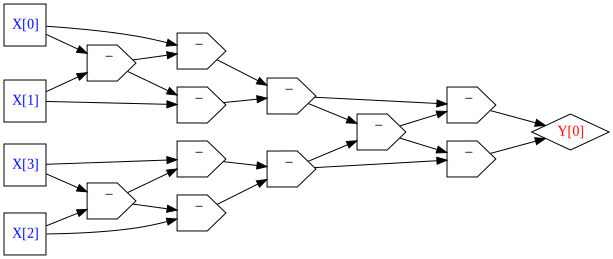

In [144]:
def XOR2(a,b):
    t1 = NAND(a,b)
    t2 = NAND(a,t1)
    t3 = NAND(b,t1)
    return NAND(t2,t3)

def XOR4(a,b,c,d): return XOR2(XOR2(a,b),XOR2(c,d))

nandcircuit(XOR4)

## Addition

__Theorem:__ For every $n$, there is a NAND program of at most $100n$ lines that computes $ADD_n:\{0,1\}^{2n} \rightarrow \{0,1\}^{n+1}$, which adds two numbers in the binary basis.

In [146]:
def MAJ(a,b,c): return OR(OR(AND(a,b),AND(b,c)),AND(a,c))
def ADDONE(a,b,c): return XOR(XOR(a,b),c), MAJ(a,b,c)

def ADD(n,A,B):
    Y = [0]*(n+1)
    carry = zero(A[0])
    for i in range(n):
        Y[i],carry = ADDONE(A[i],B[i],carry)
    Y[n] = carry
    return Y

ADD(5,[0,1,1,0,0],[1,0,0,1,0])        

[1, 1, 1, 1, 0, 0]

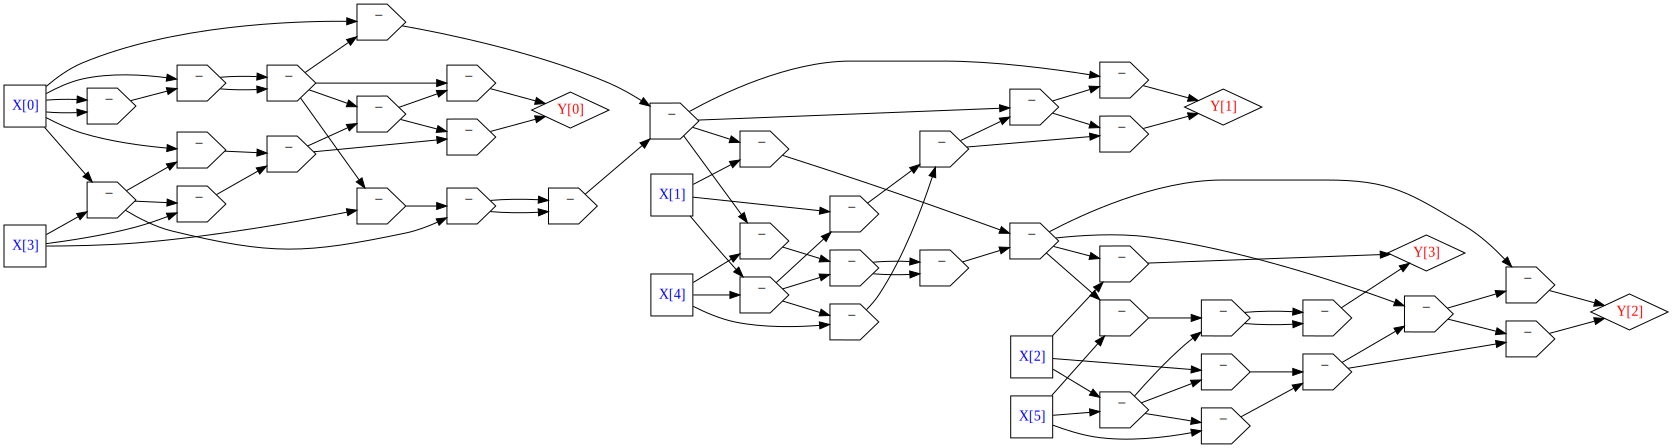

In [147]:
def add3(a0,a1,a2,b0,b1,b2):
    return ADD(3,[a0,a1,a2],[b0,b1,b2])

nandcircuit(add3,pruneit=True)

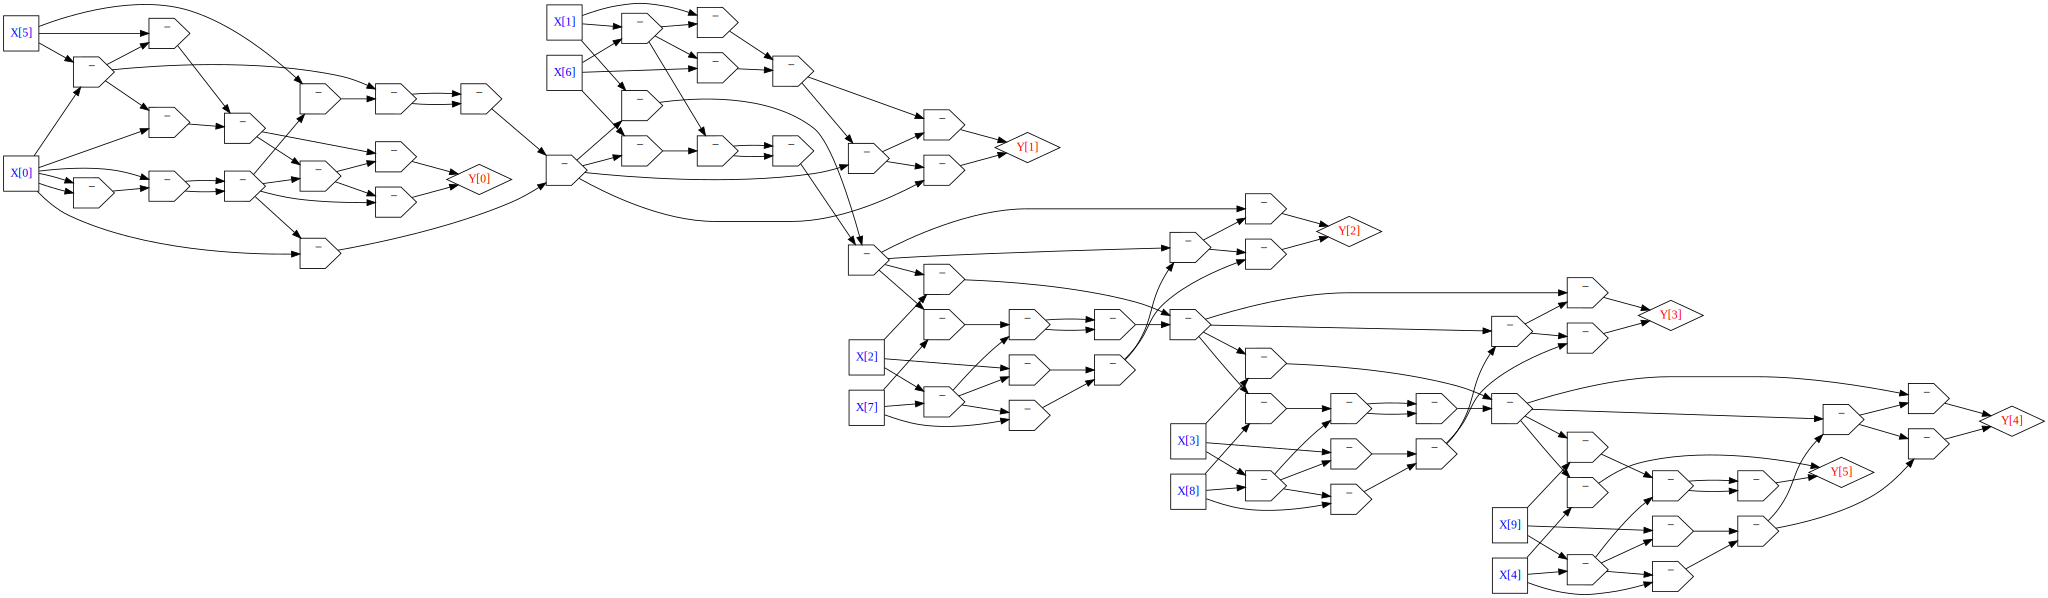

In [149]:
def add5(a0,a1,a2,a3,a4,b0,b1,b2,b3,b4):
    return ADD(5,[a0,a1,a2,a3,a4],[b0,b1,b2,b3,b4])

nandcircuit(add5,pruneit=True)

In [150]:
len(nandcode(add5).split('\n'))

104

# Bottom line

1. Can _mathematically define_ the notion of "Program $P$ computes function $F$", at least for _finite_ $F$.

2. Can describe finite programs as either _circuits_ or _code_.

3. Even this ultra simple programming language is strong enough to capture interesting algorithms. We can use the ideas of _abstraction_ and _composition_ to build complex programs from simple ones.

## Next up

__First Major Theorem:__ For every $F:\{0,1\}^n \rightarrow \{0,1\}^m$, there exists a NAND program $P$ that computes $F$.

__We show:__ There is a program $P$ using $O(\frac{m\cdot 2^n}{n})$ operations.

__Next next lecture:__  There exists _some_ $F:\{0,1\}^n \rightarrow \{0,1\}^m$, such that the shortest program $P$ to compute $F$ requires $\Omega(\frac{m \cdot 2^n}{n})$ operations